In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product


import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [72]:
pkmn=pd.read_csv('pokemon2.csv')

In [100]:
pkmn.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [101]:
pkmn.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


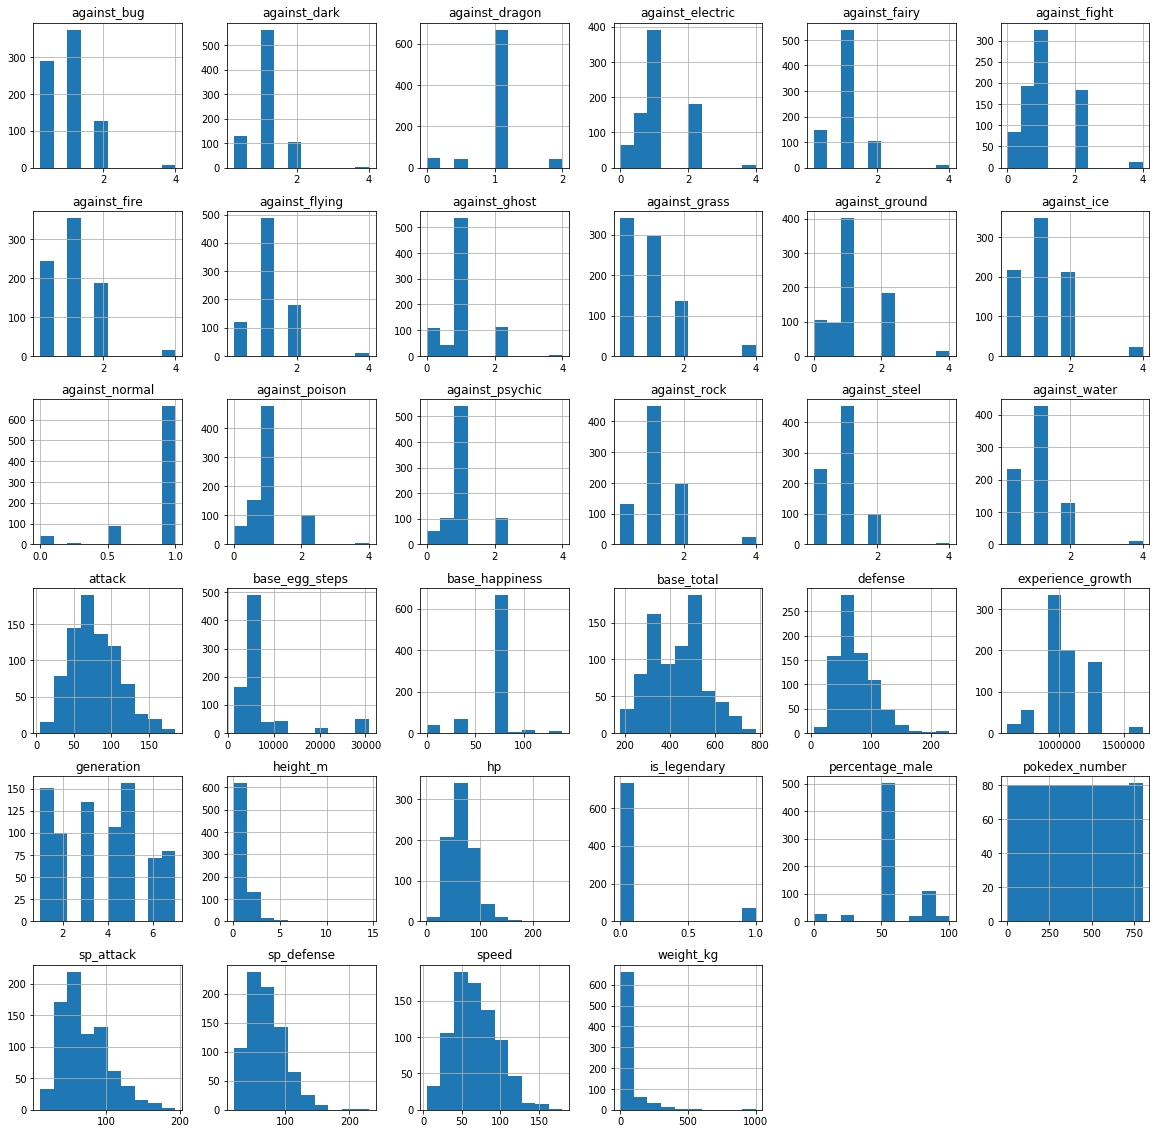

In [7]:
p=pkmn.hist(figsize=(20,20))

In [102]:
pkmn1=pkmn.drop(pkmn.columns[0:19],axis=1)

In [25]:
pkmn1.head()

,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [103]:
pkmn1.drop(["base_egg_steps","base_happiness","classfication"],axis=1,inplace=True)

In [104]:
pkmn1.drop(["experience_growth","japanese_name","pokedex_number"],axis=1,inplace=True)

In [105]:
pkmn1.head()

,attack,base_total,capture_rate,defense,height_m,hp,name,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,49,318,45,49,0.7,45,Bulbasaur,88.1,65,65,45,grass,poison,6.9,1,0
1,62,405,45,63,1.0,60,Ivysaur,88.1,80,80,60,grass,poison,13.0,1,0
2,100,625,45,123,2.0,80,Venusaur,88.1,122,120,80,grass,poison,100.0,1,0
3,52,309,45,43,0.6,39,Charmander,88.1,60,50,65,fire,NaN,8.5,1,0
4,64,405,45,58,1.1,58,Charmeleon,88.1,80,65,80,fire,NaN,19.0,1,0


In [106]:
pkmn1.drop(["generation"],axis=1,inplace=True)

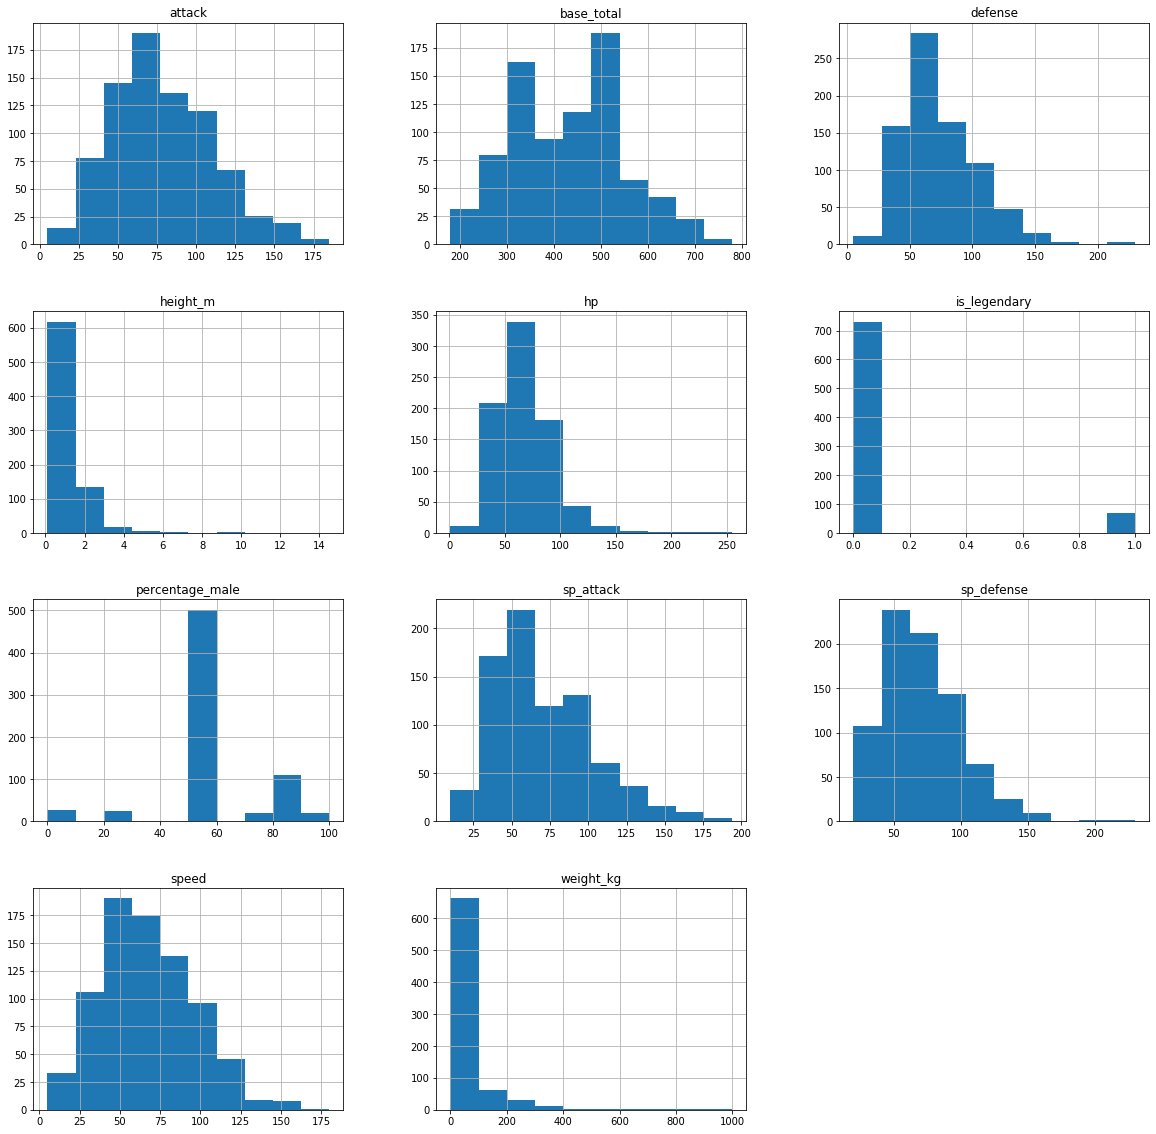

In [34]:
p=pkmn1.hist(figsize=(20,20))

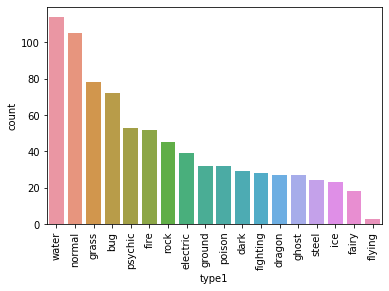

In [19]:
sns.countplot(x='type1', data=pkmn, order=pkmn['type1'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

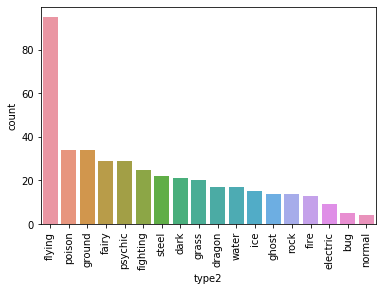

In [22]:
sns.countplot(x='type2', data=pkmn, order=pkmn['type2'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [30]:
#Checking the weakest pokemon based on total stats
pkmn_sort = pkmn.sort_values(by='base_total')
#pokemon with 10 lowest stats
print(pkmn_sort[['name', 'base_total','is_legendary']].head(10))

           name  base_total  is_legendary
190     Sunkern         180             0
297     Azurill         190             0
400   Kricketot         194             0
264     Wurmple         195             0
9      Caterpie         195             0
12       Weedle         195             0
279       Ralts         198             0
663  Scatterbug         200             0
348      Feebas         200             0
128    Magikarp         200             0


In [31]:
#Checking the strongest pokemon based on total stats
print(pkmn_sort[['name', 'base_total','is_legendary']].tail(10))

         name  base_total  is_legendary
645    Kyurem         700             1
380    Latios         700             1
379    Latias         700             1
444  Garchomp         700             0
717   Zygarde         708             1
492    Arceus         720             1
382   Groudon         770             1
381    Kyogre         770             1
383  Rayquaza         780             1
149    Mewtwo         780             1


5    156
1    151
3    135
4    107
2    100
7     80
6     72
Name: generation, dtype: int64


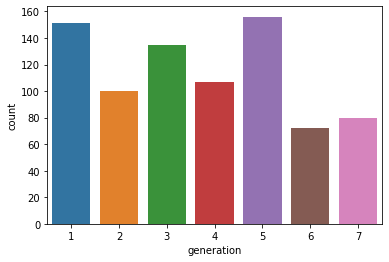

In [33]:
#How many new pokemon in each generation?

print(pkmn['generation'].value_counts())

sns.countplot(x='generation', data=pkmn)
plt.show()

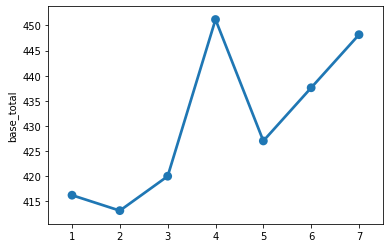

In [36]:
# Grouping by legendary and checking the mean of total stats for each generation. Just a way to see if pokemon are getting
#stronger throughout the generations
pokemon_groups = pkmn.groupby('generation')
pokemon_groups_mean = pokemon_groups.mean()

sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['base_total'])
plt.show()

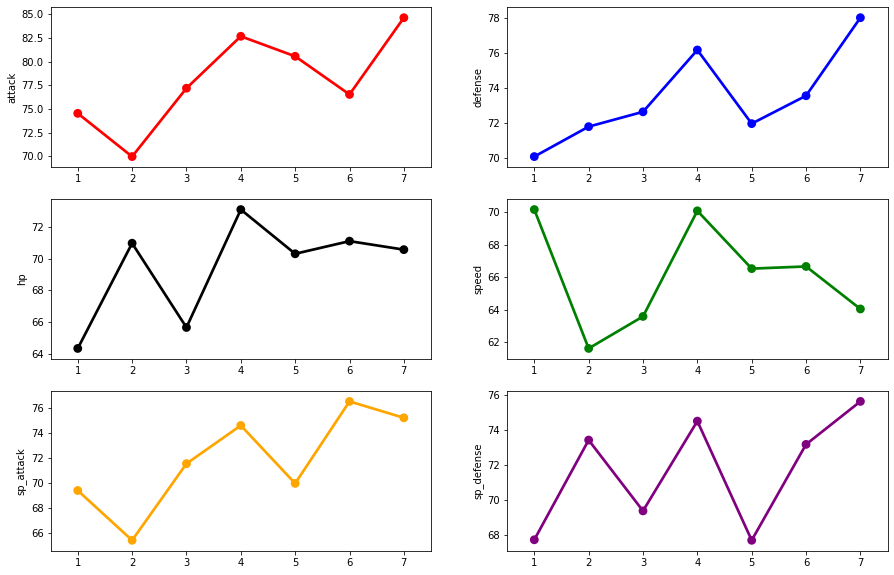

In [37]:
#Doing the same thing as aove but for each pokmeon stat
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['attack'], color='red', ax=axes[0][0])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['defense'], color='blue', ax=axes[0][1])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['hp'], color='black', ax=axes[1][0])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['speed'], color='green', ax=axes[1][1])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['sp_attack'], color='orange', ax=axes[2][0])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['sp_defense'], color='purple', ax=axes[2][1])

([<matplotlib.patches.Wedge at 0x22633145608>,
 [Text(-1.1027777585876863, 0.4731608766205412, 'Legendary'),
  Text(1.0108796526475161, -0.4337307089234487, 'Not Legendary')],
 [Text(-0.6432870258428169, 0.27601051136198235, '9.3%'),
  Text(0.5513889014440996, -0.23658038668551745, '90.7%')])

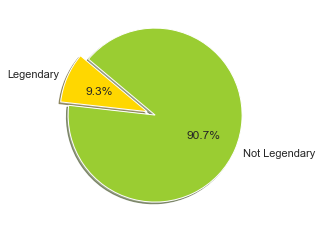

In [107]:
import matplotlib.pyplot as plt

labels = ["Legendary","Not Legendary"]
values = [sum(pkmn1.is_legendary), 751-sum(pkmn1.is_legendary)]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)
plt.pie(values, labels=labels, colors=colors,explode=explode,
autopct='%1.1f%%', shadow=True, startangle=140)

In [40]:
pkmn_leg= pkmn.loc[pkmn['is_legendary'] == True]
pkmn_non_leg= pkmn.loc[pkmn['is_legendary'] == False]

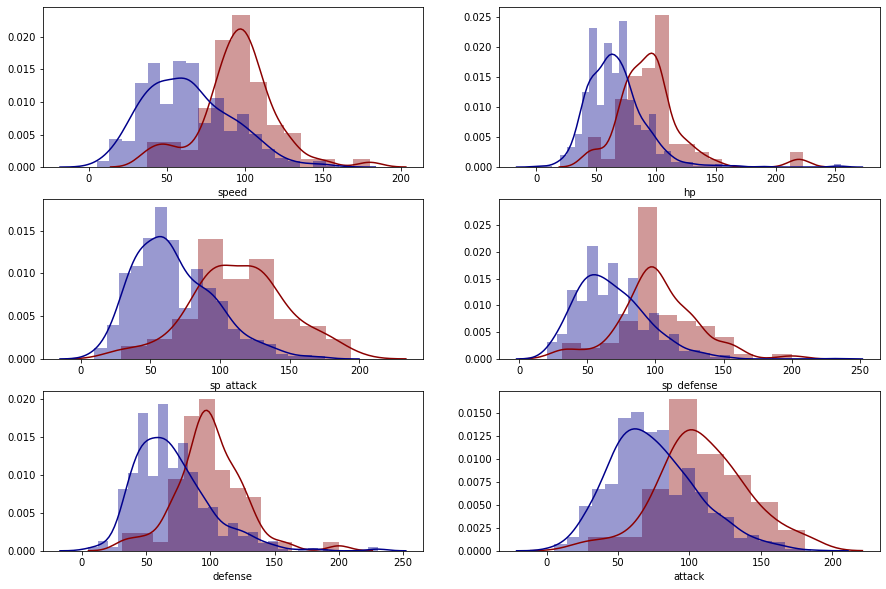

In [52]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))

speed=pkmn_leg["speed"]
speed1=pkmn_non_leg["speed"]
sns.distplot(speed,color='darkred',ax=axes[0][0])
sns.distplot(speed1,color='darkblue',ax=axes[0][0])

hp=pkmn_leg["hp"]
hp1=pkmn_non_leg["hp"]
sns.distplot(hp,color='darkred',ax=axes[0][1])
sns.distplot(hp1,color='darkblue',ax=axes[0][1])

sp_at=pkmn_leg["sp_attack"]
sp_at1=pkmn_non_leg["sp_attack"]
sns.distplot(sp_at,color='darkred',ax=axes[1][0])
sns.distplot(sp_at1,color='darkblue',ax=axes[1][0])

sp_def=pkmn_leg["sp_defense"]
sp_def1=pkmn_non_leg["sp_defense"]
sns.distplot(sp_def,color='darkred', ax=axes[1][1])
sns.distplot(sp_def1,color='darkblue', ax=axes[1][1])

defense=pkmn_leg["defense"]
defense1=pkmn_non_leg["defense"]
sns.distplot(defense,color='darkred', ax=axes[2][0])
sns.distplot(defense1,color='darkblue', ax=axes[2][0])

attack=pkmn_leg["attack"]
attack1=pkmn_non_leg["attack"]
sns.distplot(attack,color='darkred', ax=axes[2][1])
sns.distplot(attack1,color='darkblue', ax=axes[2][1])

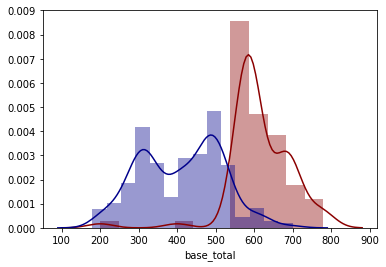

In [53]:
total=pkmn_leg["base_total"]
total1=pkmn_non_leg["base_total"]
sns.distplot(total,color='darkred')
sns.distplot(total1,color='darkblue')

In [75]:
height_array = pkmn[pkmn["height_m"]!=np.nan]["height_m"]

pkmn["height_m"].replace(np.nan,height_array.mean(),inplace=True)

height_array = pkmn[pkmn["weight_kg"]!=np.nan]["weight_kg"]

pkmn["weight_kg"].replace(np.nan,height_array.mean(),inplace=True)

In [76]:
pkmn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

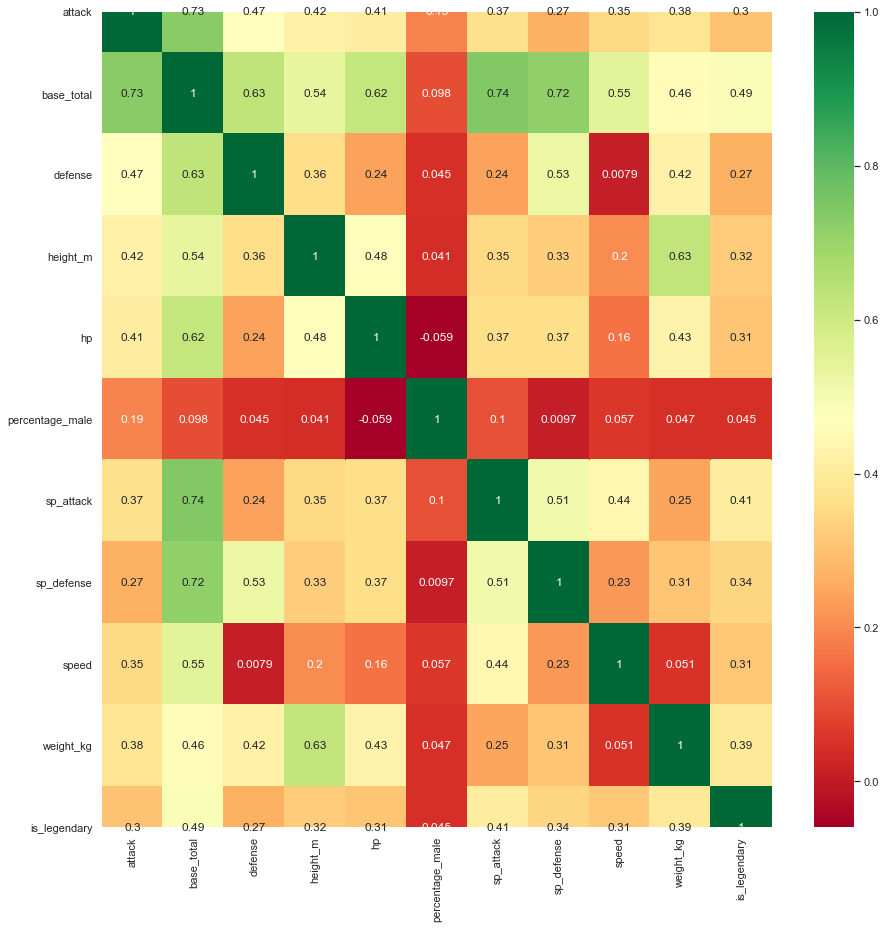

In [108]:
plt.figure(figsize=(15,15))
p=sns.heatmap(pkmn1.corr(),annot=True,cmap='RdYlGn')

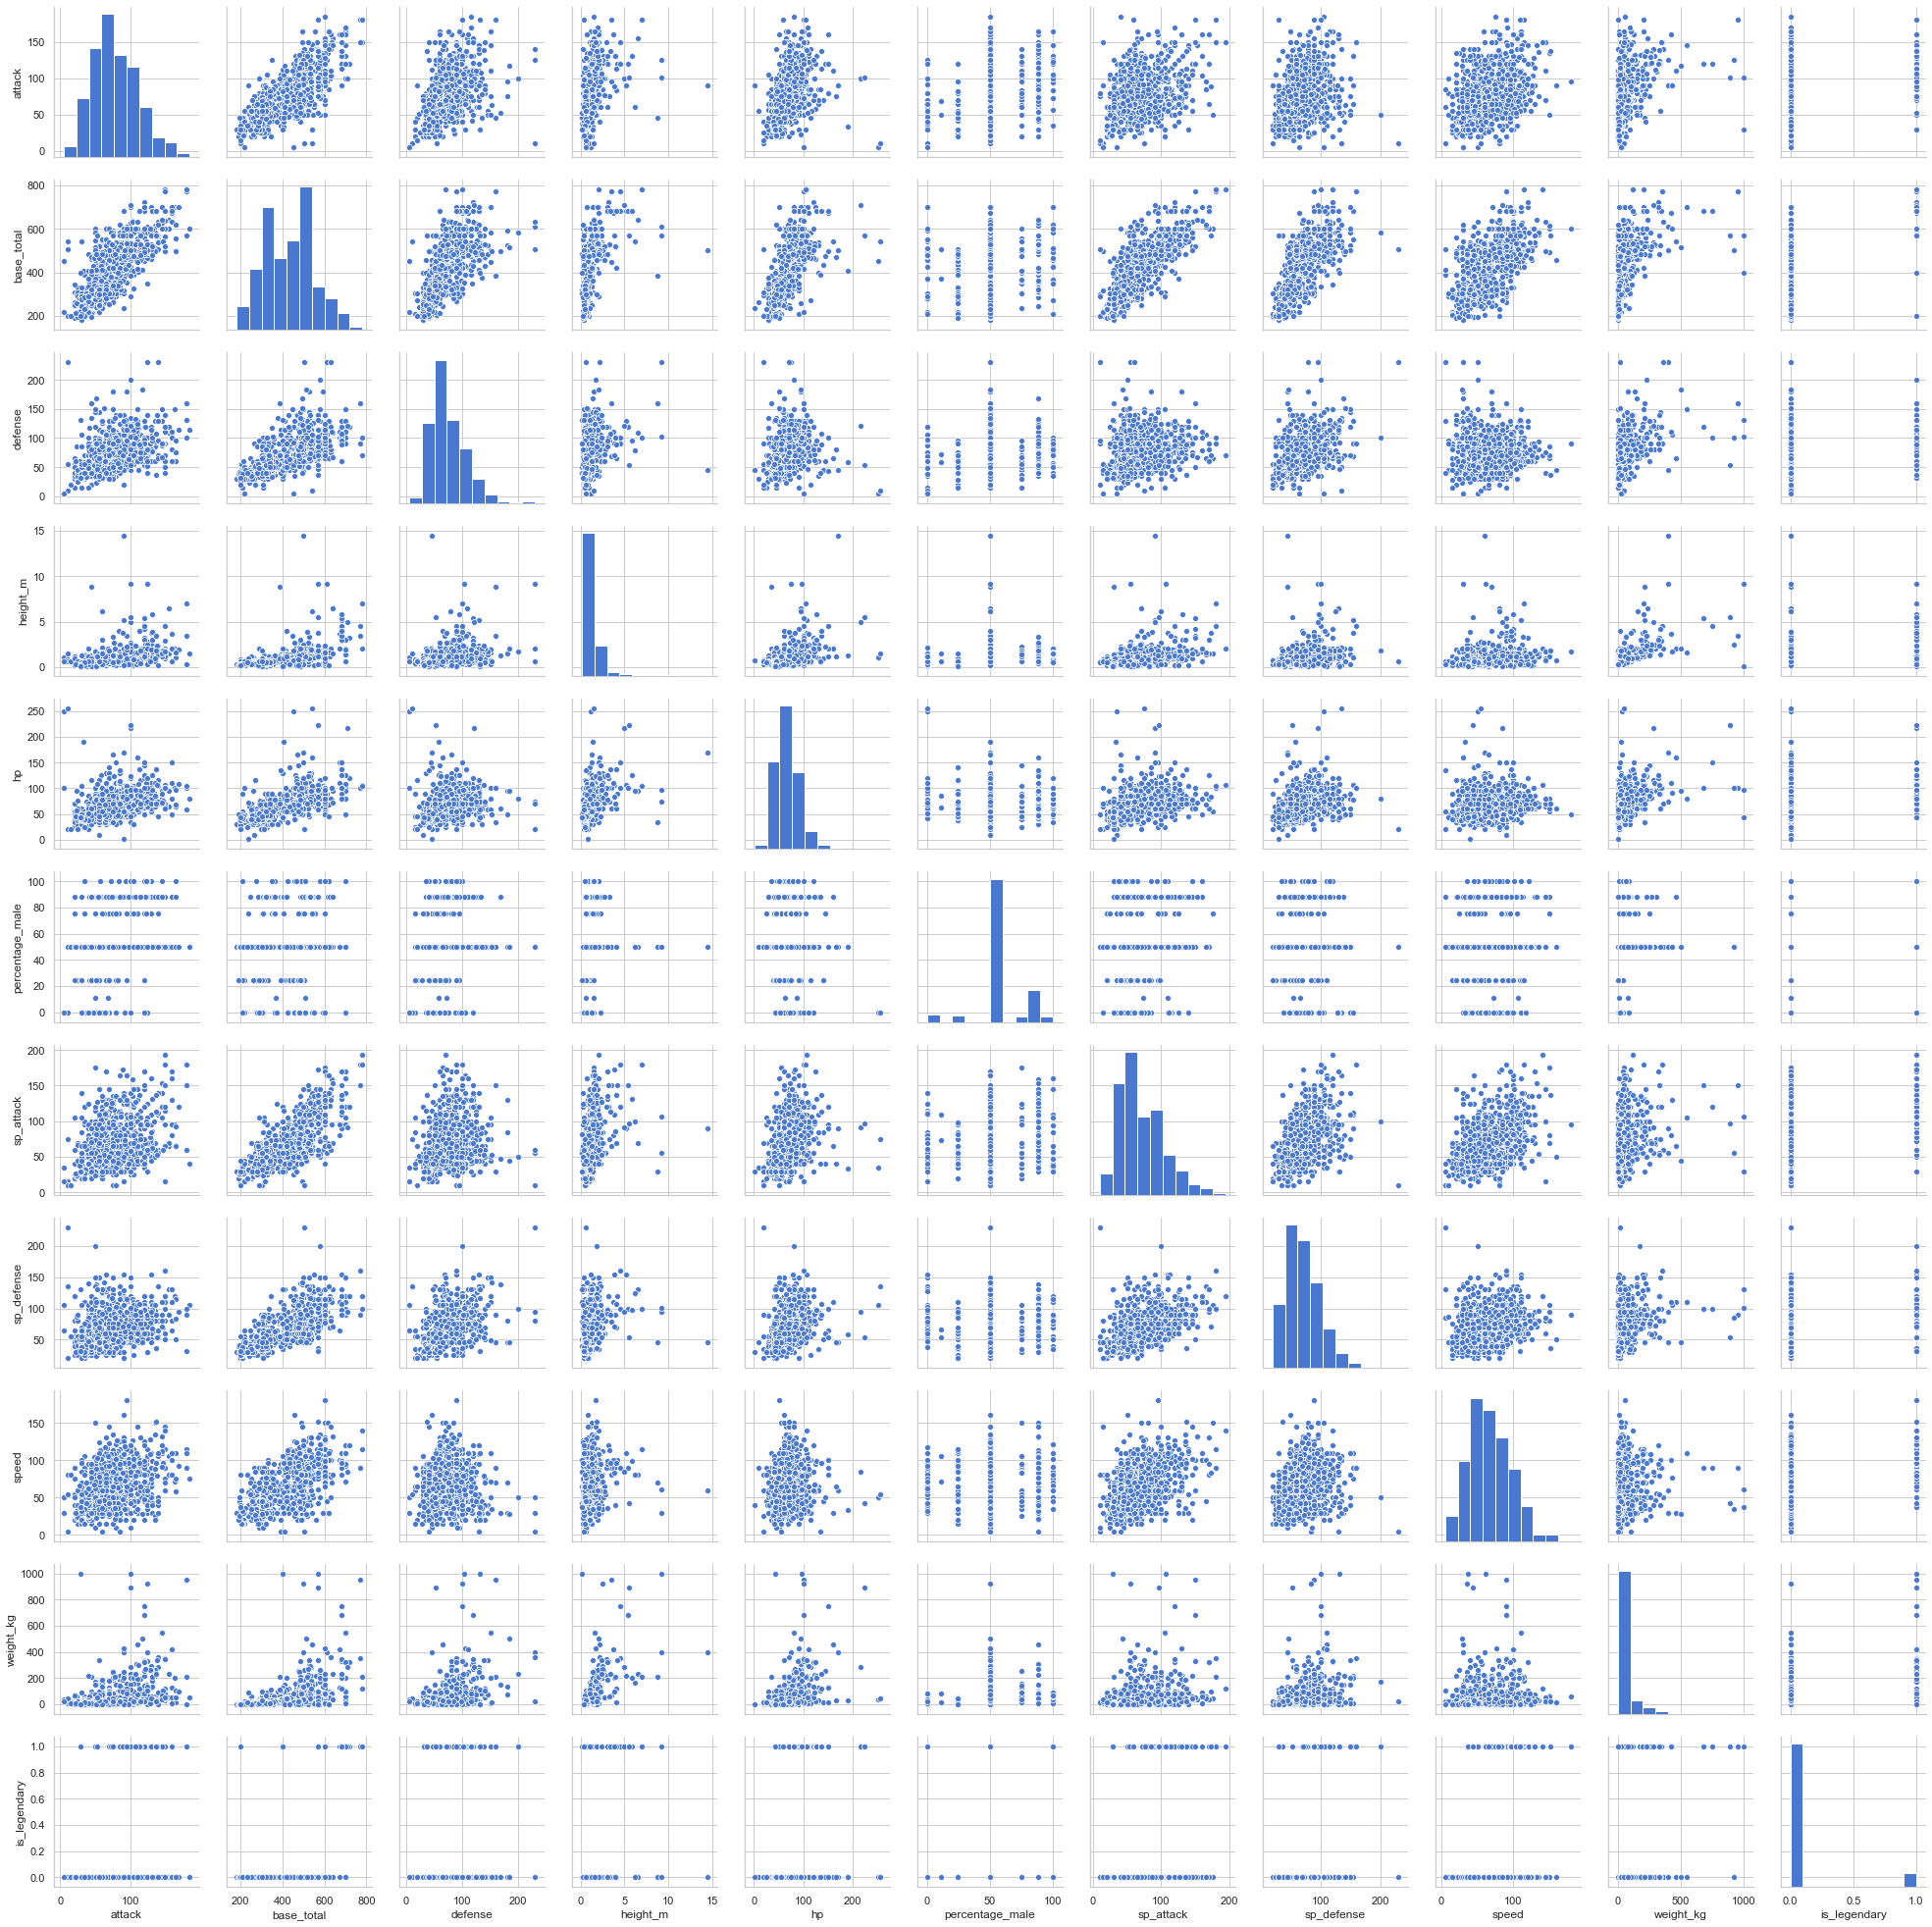

In [109]:
sns.pairplot(pkmn1)

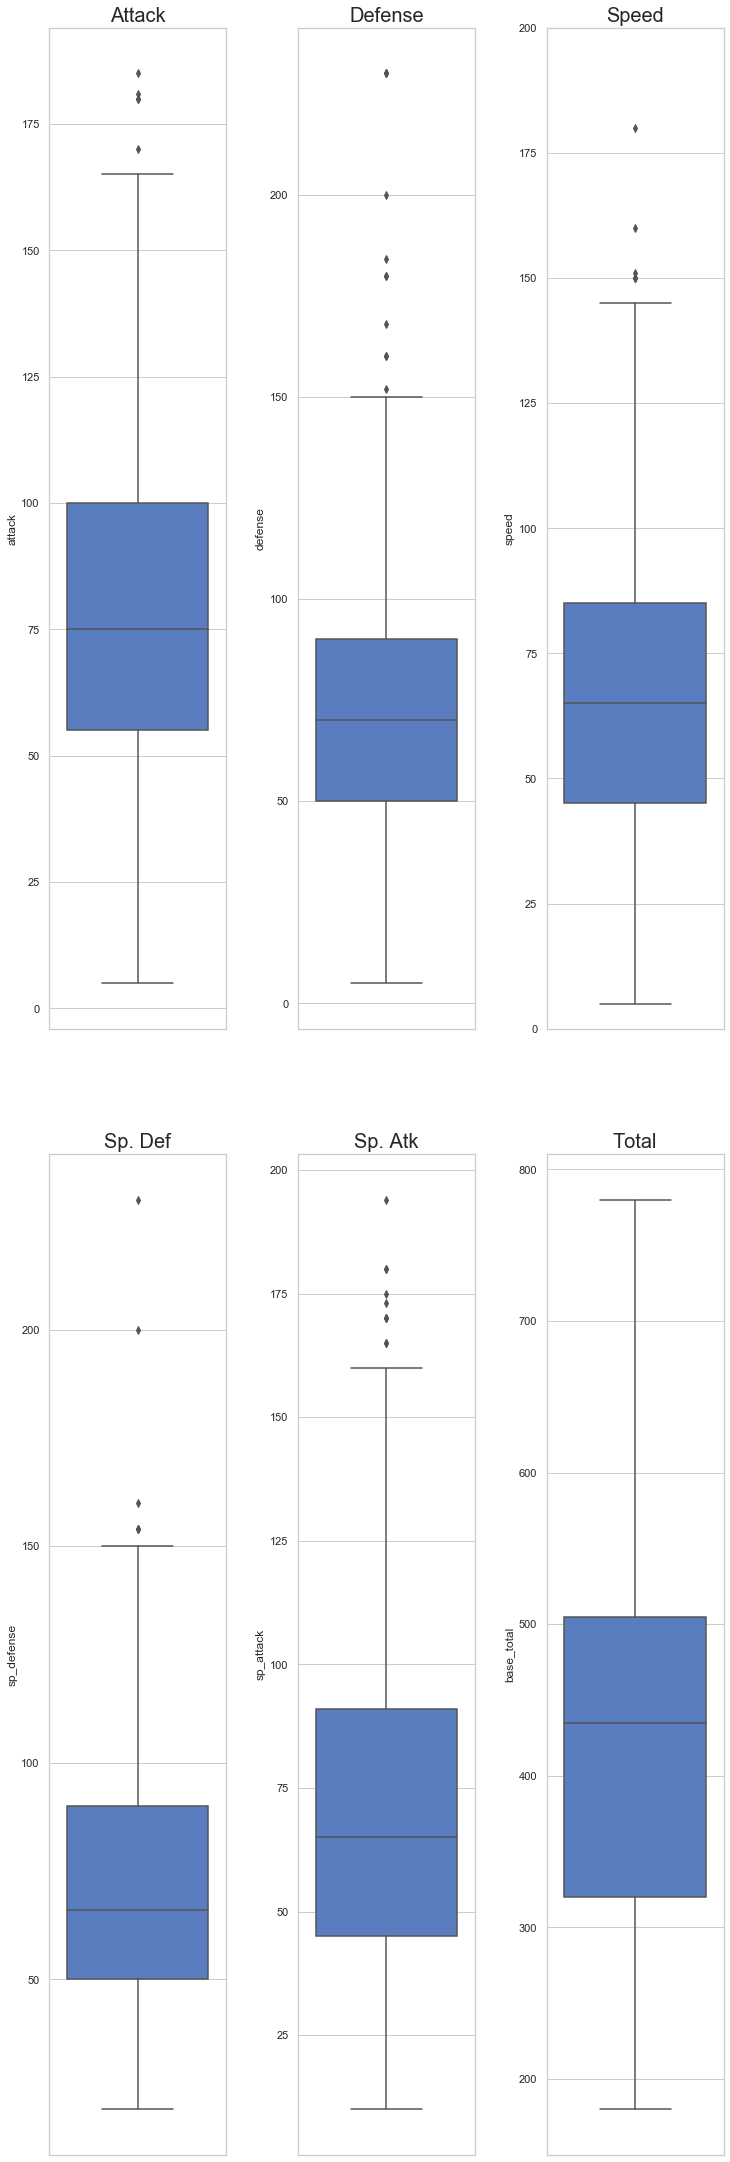

In [110]:
fig, axs = plt.subplots(2, 3, figsize = (10,30))

ax1 = plt.subplot2grid((2, 3), (0, 0)) 
ax2 = plt.subplot2grid((2, 3), (0, 1))
ax3 = plt.subplot2grid((2, 3), (0, 2))
ax4 = plt.subplot2grid((2, 3), (1, 1))
ax5 = plt.subplot2grid((2, 3), (1, 0))
ax6 = plt.subplot2grid((2, 3), (1, 2))


fig.tight_layout(pad = 0.4, w_pad = 3.0, h_pad = 8.5)

ax1.set_title("Attack", fontsize =20)
ax2.set_title("Defense", fontsize =20)
ax3.set_title("Speed", fontsize =20)
ax4.set_title("Sp. Atk", fontsize =20)
ax5.set_title("Sp. Def", fontsize =20)
ax6.set_title("Total", fontsize =20)
ax3.set_ylim(0, 200)

sns.boxplot(y = "attack",
            data = pkmn1,  ax=ax1) 
sns.boxplot(y = "defense",
            data = pkmn1, ax=ax2)


sns.boxplot(y = "speed", 
            data = pkmn1, ax=ax3)


sns.boxplot( y = "sp_attack",
            data = pkmn1, ax=ax4)


sns.boxplot(y = "sp_defense", 
            data = pkmn1, ax=ax5)


sns.boxplot( y = "base_total", 
            data = pkmn1, ax=ax6)

sns.set_context("paper") # aesthetics
sns.set(style="whitegrid", palette="muted")


plt.show()

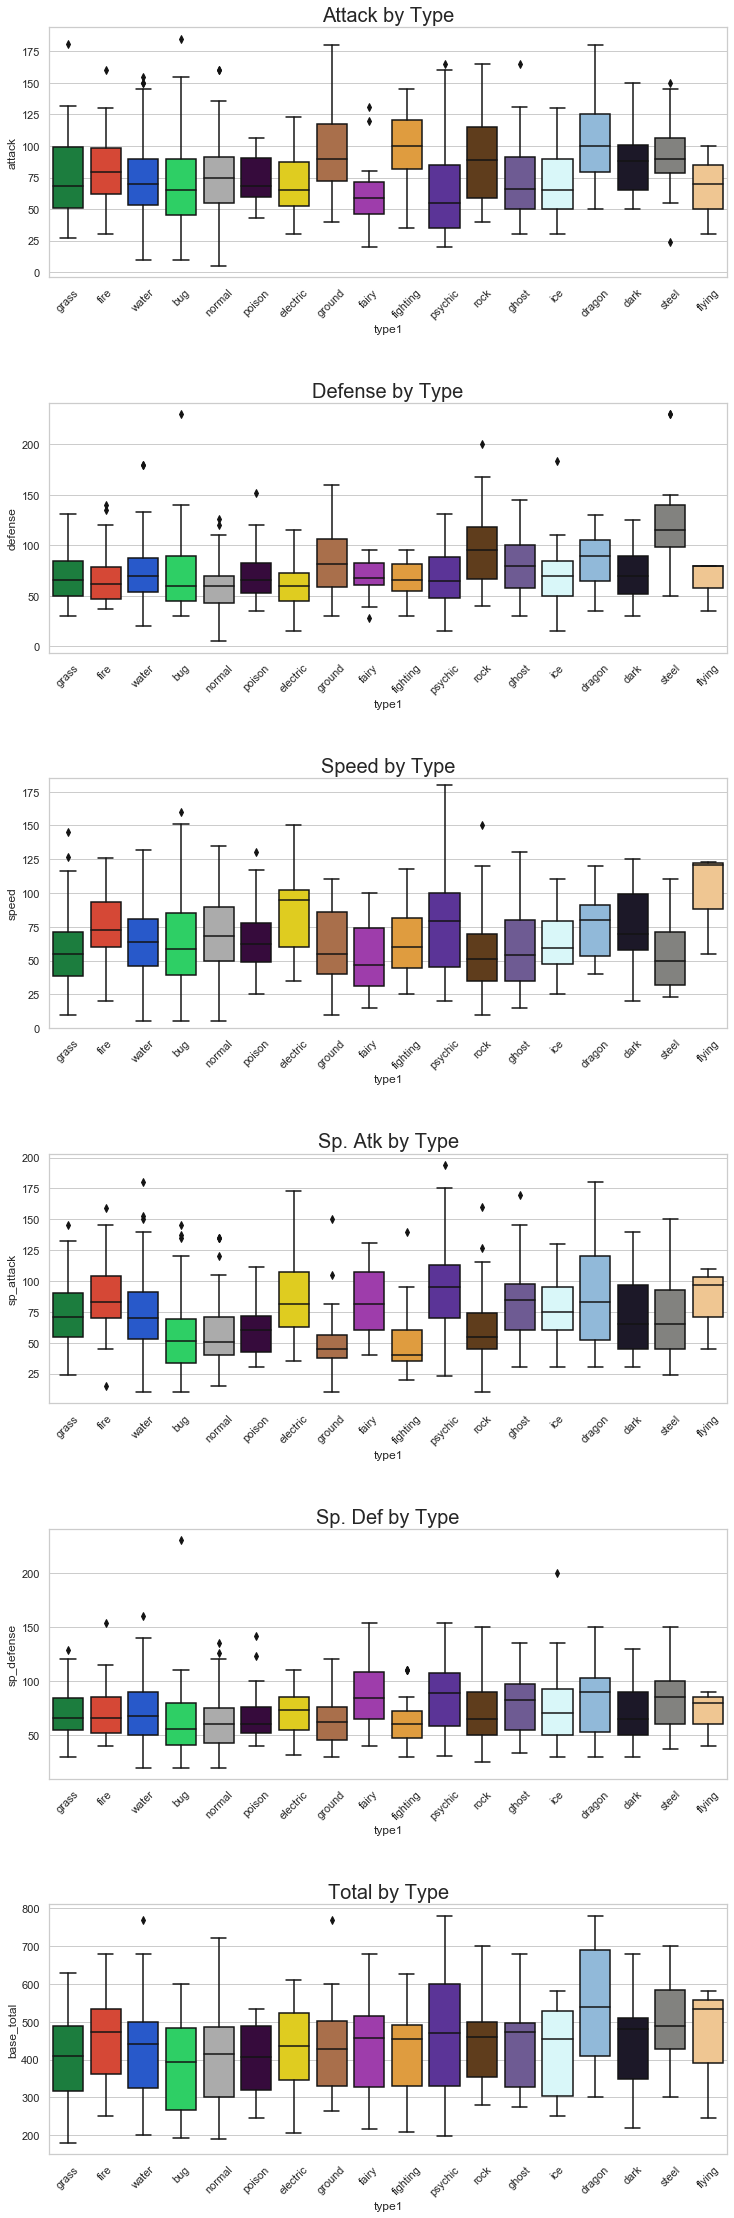

In [51]:
pokemon_color_palette = dict({"water":"#0D4EE5", "normal":"#ABABAB", "bug":"#13EA5D", "grass":"#0C8D39", "psychic":"#5823A8",
 "fire":"#EF341B", "electric":"#ffe500", "rock":"#6A3D11", "dragon":"#85BAE5", "fairy":"#AC2ABE",
"ground":"#B96B3B", "poison":"#3C0344", "ghost":"#6B529C", "fighting":"#FAA124", "steel":"#82827f",
"ice":"#D3FCFF", "flying":"#ffc882", "dark":"#1b152b"})

fig, axs = plt.subplots(6, 1, figsize = (10,30))

ax1 = plt.subplot2grid((6, 1), (0, 0)) 
ax2 = plt.subplot2grid((6, 1), (1, 0))
ax3 = plt.subplot2grid((6, 1), (2, 0))
ax4 = plt.subplot2grid((6, 1), (3, 0))
ax5 = plt.subplot2grid((6, 1), (4, 0))
ax6 = plt.subplot2grid((6, 1), (5, 0))


fig.tight_layout(pad = 0.4, w_pad = 3.0, h_pad = 8.5)

ax1.set_title("Attack by Type", fontsize =20)
ax2.set_title("Defense by Type", fontsize =20)
ax3.set_title("Speed by Type", fontsize =20)
ax4.set_title("Sp. Atk by Type", fontsize =20)
ax5.set_title("Sp. Def by Type", fontsize =20)
ax6.set_title("Total by Type", fontsize =20)
ax3.set_ylim(0, 185)

sns.boxplot(x = "type1", y = "attack",
            data = pkmn1, palette = pokemon_color_palette,  ax=ax1) 


sns.boxplot(x = "type1", y = "defense",
            data = pkmn1, palette = pokemon_color_palette, ax=ax2)


sns.boxplot(x = "type1", y = "speed", 
            data = pkmn1, palette = pokemon_color_palette, ax=ax3)
sns.boxplot(x = "type1", y = "sp_attack",
            data = pkmn1, palette = pokemon_color_palette, ax=ax4)


sns.boxplot(x = "type1", y = "sp_defense", 
            data = pkmn1, palette = pokemon_color_palette, ax=ax5)


sns.boxplot(x = "type1", y = "base_total", 
            data = pkmn1, palette = pokemon_color_palette, ax=ax6)

sns.set_context("paper") # aesthetics
sns.set(style="whitegrid", palette="muted")


for ax in fig.axes: # see side note in panel below
    plt.sca(ax)
    plt.xticks(rotation= 45)

plt.show()

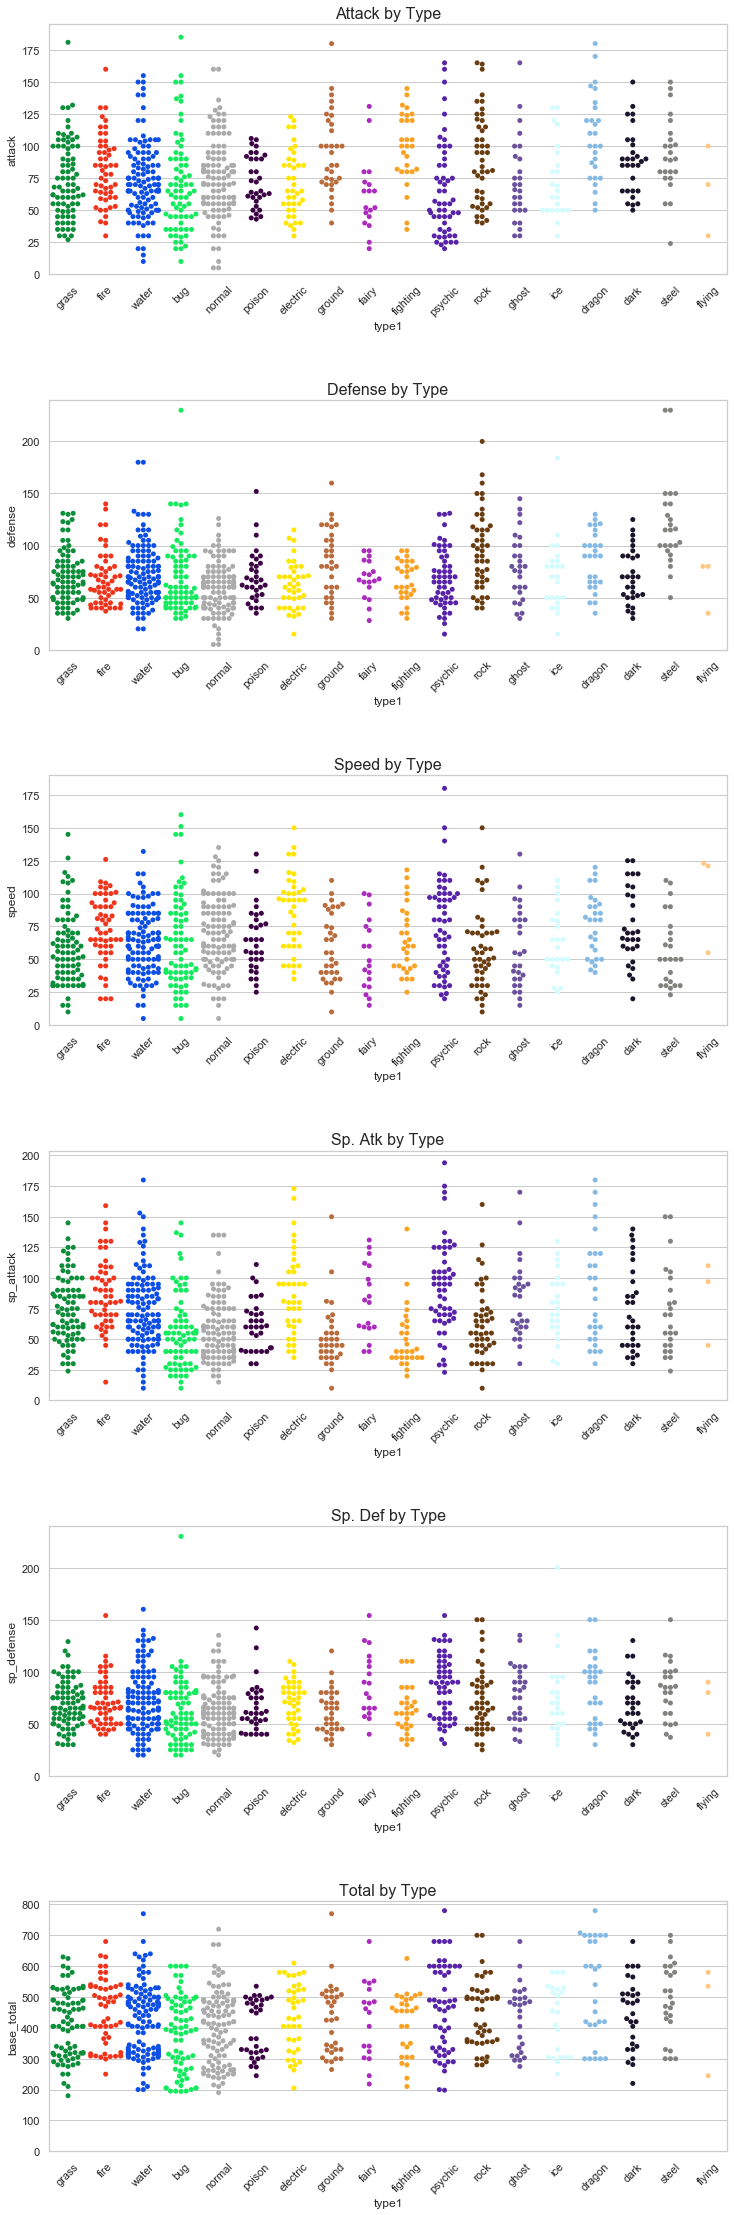

In [54]:
fig, axs = plt.subplots(6, 1, figsize = (10,30))

ax1 = plt.subplot2grid((6, 1), (0, 0)) 
ax2 = plt.subplot2grid((6, 1), (1, 0))
ax3 = plt.subplot2grid((6, 1), (2, 0))
ax4 = plt.subplot2grid((6, 1), (3, 0))
ax5 = plt.subplot2grid((6, 1), (4, 0))
ax6 = plt.subplot2grid((6, 1), (5, 0))


fig.tight_layout(pad = 0.4, w_pad = 3.0, h_pad = 8.5)

ax1.set_title("Attack by Type", fontsize =16)
ax2.set_title("Defense by Type", fontsize =16)
ax3.set_title("Speed by Type", fontsize =16)
ax4.set_title("Sp. Atk by Type", fontsize =16)
ax5.set_title("Sp. Def by Type", fontsize =16)
ax6.set_title("Total by Type", fontsize =16)

ax1.set_ylim(0, max(pkmn.attack) + 10)
ax2.set_ylim(0, max(pkmn.defense) + 10)
ax3.set_ylim(0, max(pkmn.speed) + 10)
ax4.set_ylim(0, max(pkmn.sp_attack) + 10)
ax5.set_ylim(0, max(pkmn.sp_defense) + 10)
ax6.set_ylim(0, max(pkmn.base_total) + 30)

sns.swarmplot(x = "type1", y = "attack", 
              data = pkmn1, palette = pokemon_color_palette,  ax=ax1) 
sns.swarmplot(x = "type1", y = "defense",
              data = pkmn1, palette = pokemon_color_palette, ax=ax2)


sns.swarmplot(x = "type1", y = "speed", 
              data = pkmn1, palette = pokemon_color_palette, ax=ax3)


sns.swarmplot(x = "type1", y = "sp_attack",
              data = pkmn1, palette = pokemon_color_palette, ax=ax4)


sns.swarmplot(x = "type1", y = "sp_defense", 
              data = pkmn1, palette = pokemon_color_palette, ax=ax5)


sns.swarmplot(x = "type1", y = "base_total", 
              data = pkmn1, palette = pokemon_color_palette, ax=ax6)

sns.set_context("paper") # aesthetics
sns.set(style="whitegrid", palette="muted")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation= 45)
    
plt.show()

In [111]:
grass= pkmn1.loc[pkmn1['type1'] == 'grass']
fire= pkmn1.loc[pkmn1['type1'] == 'fire']
water=pkmn1.loc[pkmn1['type1'] == 'water']
electric=pkmn1.loc[pkmn1['type1'] == 'electric']

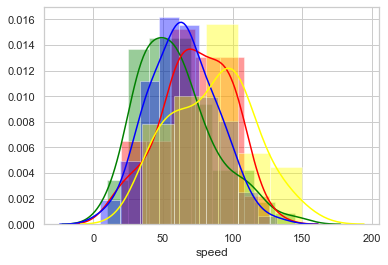

In [112]:
speed1=grass["speed"]
speed2=fire["speed"]
speed3=water["speed"]
speed4=electric["speed"]
sns.distplot(speed1,color='green')
sns.distplot(speed2,color='red')
sns.distplot(speed3,color='Blue')
sns.distplot(speed4,color='Yellow')

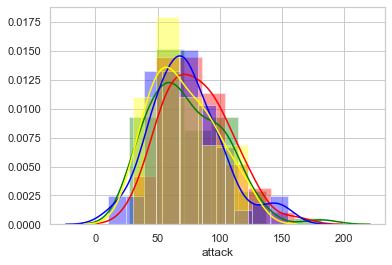

In [113]:
speed1=grass["attack"]
speed2=fire["attack"]
speed3=water["attack"]
speed4=electric["attack"]
sns.distplot(speed1,color='green')
sns.distplot(speed2,color='red')
sns.distplot(speed3,color='Blue')
sns.distplot(speed4,color='Yellow')

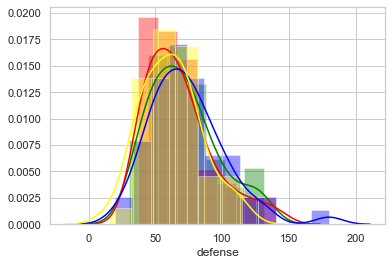

In [114]:
speed1=grass["defense"]
speed2=fire["defense"]
speed3=water["defense"]
speed4=electric["defense"]
sns.distplot(speed1,color='green')
sns.distplot(speed2,color='red')
sns.distplot(speed3,color='Blue')
sns.distplot(speed4,color='Yellow')

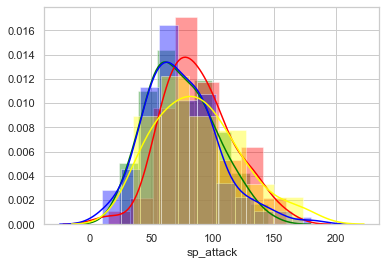

In [115]:
speed1=grass["sp_attack"]
speed2=fire["sp_attack"]
speed3=water["sp_attack"]
speed4=electric["sp_attack"]
sns.distplot(speed1,color='green')
sns.distplot(speed2,color='red')
sns.distplot(speed3,color='Blue')
sns.distplot(speed4,color='Yellow')

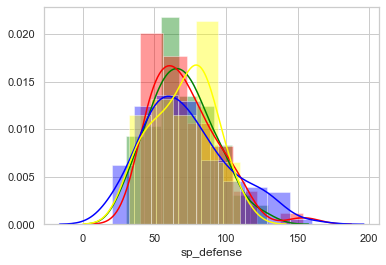

In [116]:
speed1=grass["sp_defense"]
speed2=fire["sp_defense"]
speed3=water["sp_defense"]
speed4=electric["sp_defense"]
sns.distplot(speed1,color='green')
sns.distplot(speed2,color='red')
sns.distplot(speed3,color='Blue')
sns.distplot(speed4,color='Yellow')

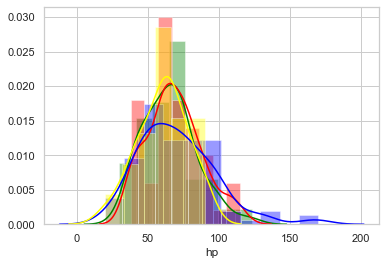

In [117]:
speed1=grass["hp"]
speed2=fire["hp"]
speed3=water["hp"]
speed4=electric["hp"]
sns.distplot(speed1,color='green')
sns.distplot(speed2,color='red')
sns.distplot(speed3,color='Blue')
sns.distplot(speed4,color='Yellow')

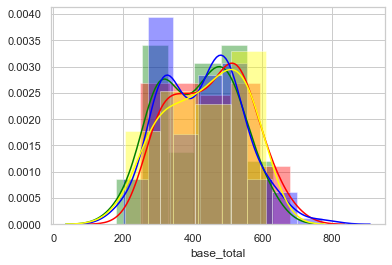

In [118]:
speed1=grass["base_total"]
speed2=fire["base_total"]
speed3=water["base_total"]
speed4=electric["base_total"]
sns.distplot(speed1,color='green')
sns.distplot(speed2,color='red')
sns.distplot(speed3,color='Blue')
sns.distplot(speed4,color='Yellow')

In [71]:
pkmn1.head()

,attack,base_total,capture_rate,defense,height_m,hp,name,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,is_legendary
0,49,318,45,49,0.7,45,Bulbasaur,88.1,65,65,45,grass,poison,6.9,0
1,62,405,45,63,1.0,60,Ivysaur,88.1,80,80,60,grass,poison,13.0,0
2,100,625,45,123,2.0,80,Venusaur,88.1,122,120,80,grass,poison,100.0,0
3,52,309,45,43,0.6,39,Charmander,88.1,60,50,65,fire,NaN,8.5,0
4,64,405,45,58,1.1,58,Charmeleon,88.1,80,65,80,fire,NaN,19.0,0


In [119]:
pkmn1.drop(['type1','type2','base_total','height_m','is_legendary','weight_kg','percentage_male','height_m','name'],axis=1,inplace=True)


In [120]:
pkmn1.drop(['capture_rate'],axis=1,inplace=True)

In [121]:
pkmn.loc[pkmn.name=="Venusaur"]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0


In [79]:
pkmn.loc[pkmn.name=="Charizard"]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,88.1,6,159,115,100,fire,flying,90.5,1,0


In [80]:
pkmn.loc[pkmn.name=="Blastoise"]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
8,"['Torrent', 'Rain Dish']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,9,135,115,78,water,NaN,85.5,1,0


NameError: name 'pkmn1' is not defined

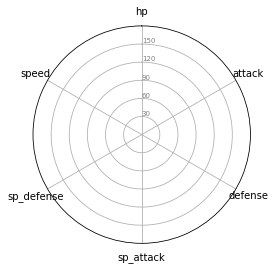

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

categories=list(['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'])
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([30,60,90,120,150], ["30","60","90","120","150"], color="grey", size=7)
plt.ylim(0,180)

 #------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=pkmn1.loc[8].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)
# Ind2
values=pkmn1.loc[5].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'r', alpha=0.1)
#Ind3
values=pkmn1.loc[2].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'r', alpha=0.1)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [82]:
pkmn.loc[pkmn.name=="Meganium"]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
153,"['Overgrow', 'Leaf Guard']",2.0,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,...,88.1,154,83,100,80,grass,NaN,100.5,2,0


In [83]:
pkmn.loc[pkmn.name=="Typhlosion"]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
156,"['Blaze', 'Flash Fire']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,157,109,85,100,fire,NaN,79.5,2,0


In [84]:
pkmn.loc[pkmn.name=="Feraligatr"]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
159,"['Torrent', 'Sheer Force']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,160,79,83,78,water,NaN,88.8,2,0


No handles with labels found to put in legend.


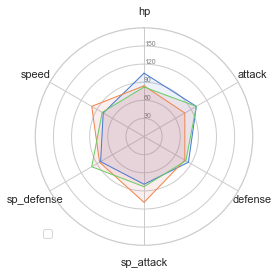

In [92]:
categories=list(['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'])
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([30,60,90,120,150], ["30","60","90","120","150"], color="grey", size=7)
plt.ylim(0,180)

 #------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=pkmn1.loc[159].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)
# Ind2
values=pkmn1.loc[156].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'r', alpha=0.1)
#Ind3
values=pkmn1.loc[153].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'r', alpha=0.1)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [122]:
pkmn.loc[pkmn.name=="Sceptile"]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
253,"['Overgrow', 'Unburden']",2.0,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,...,88.1,254,145,85,145,grass,NaN,52.2,3,0


In [89]:
pkmn.loc[pkmn.name=="Blaziken"]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
256,"['Blaze', 'Speed Boost']",0.25,0.5,1.0,1.0,1.0,1.0,0.5,2.0,1.0,...,88.1,257,130,80,100,fire,fighting,52.0,3,0


In [94]:
pkmn.loc[pkmn.name=="Swampert"]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
259,"['Torrent', 'Damp']",1.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,1.0,...,88.1,260,95,110,70,water,ground,81.9,3,0


No handles with labels found to put in legend.


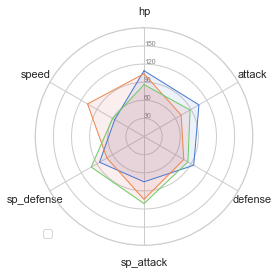

In [130]:
categories=list(['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'])
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([30,60,90,120,150], ["30","60","90","120","150"], color="grey", size=7)
plt.ylim(0,180)

 #------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=pkmn1.loc[259].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)
# Ind2
values=pkmn1.loc[256].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'r', alpha=0.1)
#Ind3
values=pkmn1.loc[253].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'r', alpha=0.1)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [124]:
pkmn.loc[pkmn.name=="Torterra"]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
388,"['Overgrow', 'Shell Armor']",2.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,1.0,...,88.1,389,75,85,56,grass,ground,310.0,4,0


In [128]:
pkmn.loc[pkmn.name=="Infernape"]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
391,"['Blaze', 'Iron Fist']",0.25,0.5,1.0,1.0,1.0,1.0,0.5,2.0,1.0,...,88.1,392,104,71,108,fire,fighting,55.0,4,0


In [129]:
pkmn.loc[pkmn.name=="Empoleon"]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
394,"['Torrent', 'Defiant']",0.5,1.0,0.5,2.0,0.5,2.0,1.0,0.5,1.0,...,88.1,395,111,101,60,water,steel,84.5,4,0


No handles with labels found to put in legend.


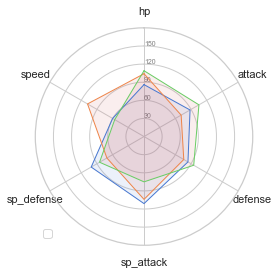

In [141]:
categories=list(['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'])
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([30,60,90,120,150], ["30","60","90","120","150"], color="grey", size=7)
plt.ylim(0,180)

 #------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=pkmn1.loc[394].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)
# Ind2
values=pkmn1.loc[391].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'r', alpha=0.1)
#Ind3
values=pkmn1.loc[388].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'r', alpha=0.1)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [132]:
pkmn.loc[pkmn.name=="Serperior"]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
496,"['Overgrow', 'Contrary']",2.0,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,...,88.1,497,75,95,113,grass,NaN,63.0,5,0


In [133]:
pkmn.loc[pkmn.name=="Emboar"]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
499,"['Blaze', 'Reckless']",0.25,0.5,1.0,1.0,1.0,1.0,0.5,2.0,1.0,...,88.1,500,100,65,65,fire,fighting,150.0,5,0


In [134]:
pkmn.loc[pkmn.name=="Samurott"]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
502,"['Torrent', 'Shell Armor']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,503,108,70,70,water,NaN,94.6,5,0


No handles with labels found to put in legend.


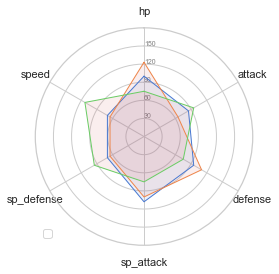

In [142]:
categories=list(['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'])
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([30,60,90,120,150], ["30","60","90","120","150"], color="grey", size=7)
plt.ylim(0,180)

 #------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=pkmn1.loc[502].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)
# Ind2
values=pkmn1.loc[499].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'r', alpha=0.1)
#Ind3
values=pkmn1.loc[496].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'r', alpha=0.1)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [136]:
pkmn.loc[pkmn.name=="Chesnaught"]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
651,"['Overgrow', 'Bulletproof']",1.0,0.5,1.0,0.5,2.0,1.0,2.0,4.0,1.0,...,88.1,652,74,75,64,grass,fighting,90.0,6,0


In [139]:
pkmn.loc[pkmn.name=="Delphox"]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
654,"['Blaze', 'Magician']",1.0,2.0,1.0,1.0,0.5,0.5,0.5,1.0,2.0,...,88.1,655,114,100,104,fire,psychic,39.0,6,0


In [138]:
pkmn.loc[pkmn.name=="Greninja"]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
657,"['Torrent', 'Protean', 'Battle Bond']",2.0,0.5,1.0,2.0,2.0,2.0,0.5,1.0,0.5,...,88.1,658,153,71,132,water,dark,40.0,6,0


No handles with labels found to put in legend.


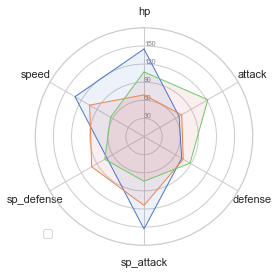

In [143]:
categories=list(['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'])
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([30,60,90,120,150], ["30","60","90","120","150"], color="grey", size=7)
plt.ylim(0,180)

 #------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=pkmn1.loc[657].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)
# Ind2
values=pkmn1.loc[654].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'r', alpha=0.1)
#Ind3
values=pkmn1.loc[651].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'r', alpha=0.1)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [144]:
pkmn.loc[pkmn.name=="Decidueye"]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
723,"['Overgrow', 'Long Reach']",1.0,2.0,1.0,0.5,1.0,0.0,2.0,2.0,2.0,...,88.1,724,100,100,70,grass,ghost,36.6,7,0


In [145]:
pkmn.loc[pkmn.name=="Incineroar"]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
726,"['Blaze', 'Intimidate']",1.0,0.5,1.0,1.0,1.0,2.0,0.5,1.0,0.5,...,88.1,727,80,90,60,fire,dark,83.0,7,0


In [146]:
pkmn.loc[pkmn.name=="Primarina"]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
729,"['Torrent', 'Liquid Voice']",0.5,0.5,0.0,2.0,1.0,0.5,0.5,1.0,1.0,...,88.1,730,126,116,60,water,fairy,44.0,7,0


No handles with labels found to put in legend.


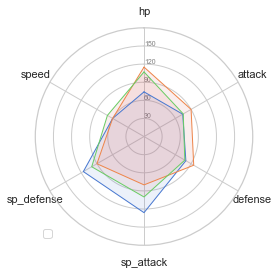

In [148]:
categories=list(['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'])
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([30,60,90,120,150], ["30","60","90","120","150"], color="grey", size=7)
plt.ylim(0,180)

 #------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=pkmn1.loc[729].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)
# Ind2
values=pkmn1.loc[726].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'r', alpha=0.1)
#Ind3
values=pkmn1.loc[723].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'r', alpha=0.1)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [149]:
################### MACHINE LEARNING PART ##################################

In [295]:
poke_data=pd.read_csv('pokemon2.csv')

In [296]:
type_1_list=list(poke_data['type1'].value_counts().index)
type_2_list=list(poke_data['type2'].value_counts().index)

In [297]:
type_1_list.sort()==type_2_list.sort()

True

In [298]:
dummy_type_1=pd.get_dummies(poke_data['type1'])
dummy_type_2=pd.get_dummies(poke_data['type2'])

In [299]:
dummy_final=pd.DataFrame(index=poke_data.index)
for column_name in type_2_list:
    dummy_final[column_name]=dummy_type_1[column_name]+dummy_type_2[column_name]

In [300]:
dummy_final.head()

,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [301]:
poke_data_new=pd.concat([poke_data,dummy_final],sort=False,axis=1)
poke_data_new.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0,1,0,0,0,1,0,0,0,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0,1,0,0,0,1,0,0,0,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0,1,0,0,0,1,0,0,0,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [302]:
poke_data_new.drop(['type1','type2'],axis=1,inplace=True)
poke_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 57 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

In [303]:
poke_data_new.drop(poke_data_new.columns[0:18],axis=1,inplace=True)
poke_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 39 columns):
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness       801 non-null int64
base_total           801 non-null int64
capture_rate         801 non-null object
classfication        801 non-null object
defense              801 non-null int64
experience_growth    801 non-null int64
height_m             781 non-null float64
hp                   801 non-null int64
japanese_name        801 non-null object
name                 801 non-null object
percentage_male      703 non-null float64
pokedex_number       801 non-null int64
sp_attack            801 non-null int64
sp_defense           801 non-null int64
speed                801 non-null int64
weight_kg            781 non-null float64
generation           801 non-null int64
is_legendary         801 non-null int64
bug                  801 non-null uint8
dar

In [304]:
poke_data_new.drop(poke_data_new.columns[0],axis=1,inplace=True)

In [305]:
poke_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 38 columns):
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness       801 non-null int64
base_total           801 non-null int64
capture_rate         801 non-null object
classfication        801 non-null object
defense              801 non-null int64
experience_growth    801 non-null int64
height_m             781 non-null float64
hp                   801 non-null int64
japanese_name        801 non-null object
name                 801 non-null object
percentage_male      703 non-null float64
pokedex_number       801 non-null int64
sp_attack            801 non-null int64
sp_defense           801 non-null int64
speed                801 non-null int64
weight_kg            781 non-null float64
generation           801 non-null int64
is_legendary         801 non-null int64
bug                  801 non-null uint8
dark                 801 non-null uint8
drago

In [306]:
poke_data_new.drop(["japanese_name","name","percentage_male","pokedex_number","generation","classfication"],axis=1,inplace=True)

In [307]:
poke_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 32 columns):
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness       801 non-null int64
base_total           801 non-null int64
capture_rate         801 non-null object
defense              801 non-null int64
experience_growth    801 non-null int64
height_m             781 non-null float64
hp                   801 non-null int64
sp_attack            801 non-null int64
sp_defense           801 non-null int64
speed                801 non-null int64
weight_kg            781 non-null float64
is_legendary         801 non-null int64
bug                  801 non-null uint8
dark                 801 non-null uint8
dragon               801 non-null uint8
electric             801 non-null uint8
fairy                801 non-null uint8
fighting             801 non-null uint8
fire                 801 non-null uint8
flying               801 non-null uint8
ghost     

In [308]:
height_array = poke_data_new[poke_data_new["height_m"]!=np.nan]["height_m"]

poke_data_new["height_m"].replace(np.nan,height_array.mean(),inplace=True)

In [309]:
weight_array = poke_data_new[poke_data_new["weight_kg"]!=np.nan]["weight_kg"]

poke_data_new["weight_kg"].replace(np.nan,weight_array.mean(),inplace=True)

In [310]:
poke_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 32 columns):
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness       801 non-null int64
base_total           801 non-null int64
capture_rate         801 non-null object
defense              801 non-null int64
experience_growth    801 non-null int64
height_m             801 non-null float64
hp                   801 non-null int64
sp_attack            801 non-null int64
sp_defense           801 non-null int64
speed                801 non-null int64
weight_kg            801 non-null float64
is_legendary         801 non-null int64
bug                  801 non-null uint8
dark                 801 non-null uint8
dragon               801 non-null uint8
electric             801 non-null uint8
fairy                801 non-null uint8
fighting             801 non-null uint8
fire                 801 non-null uint8
flying               801 non-null uint8
ghost     

In [311]:
poke_data_new.drop(["base_happiness"],axis=1,inplace=True)

In [312]:
poke_test=poke_data_new.drop(["bug","dark","dragon","electric","fairy","fighting","fire","flying","ghost","grass","ground","ice","normal","poison","psychic","rock","steel","water"],axis=1)

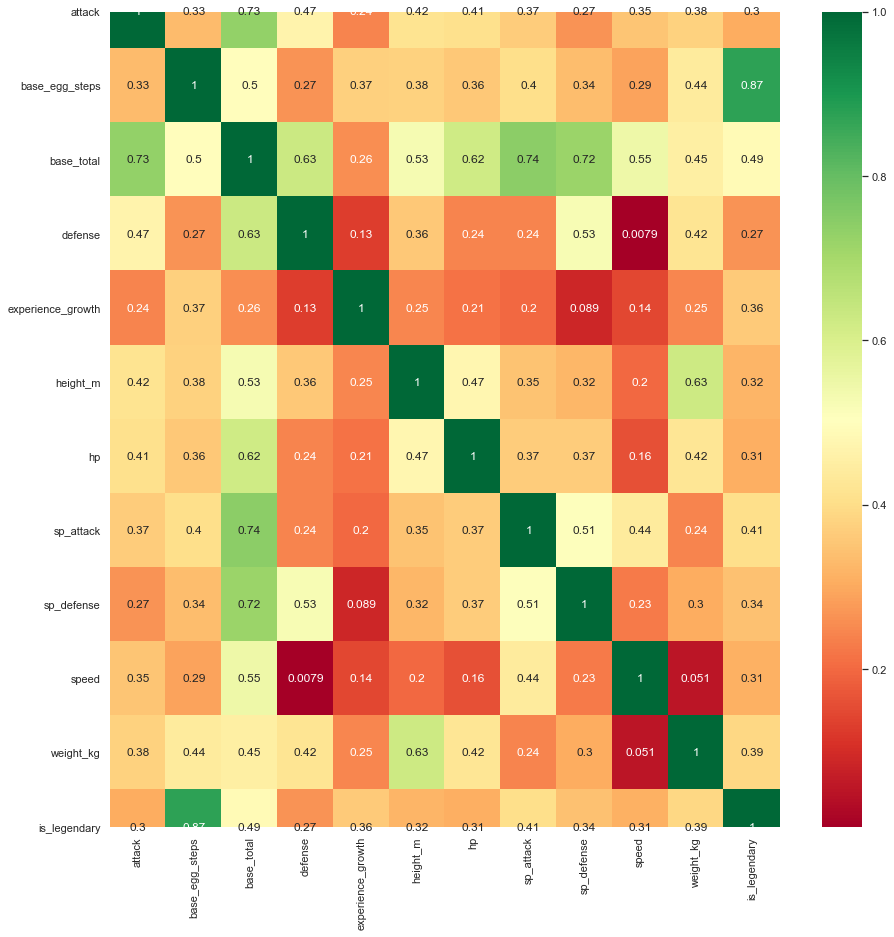

In [313]:
plt.figure(figsize=(15,15))
p=sns.heatmap(poke_test.corr(),annot=True,cmap='RdYlGn')

In [315]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numerical =  pd.DataFrame(sc_X.fit_transform(poke_data_new[['base_total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed','base_egg_steps','experience_growth','height_m',"weight_kg"]]),columns=['base_total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed','base_egg_steps','experience_growth','height_m',"weight_kg"],index= poke_data_new.index)

In [316]:
poke_clean_standard = poke_data_new.copy(deep=True)
poke_clean_standard[['base_total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed','base_egg_steps','experience_growth','height_m',"weight_kg"]] = numerical[['base_total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed','base_egg_steps','experience_growth','height_m',"weight_kg"]]

In [317]:
poke_clean_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 31 columns):
attack               801 non-null float64
base_egg_steps       801 non-null float64
base_total           801 non-null float64
capture_rate         801 non-null object
defense              801 non-null float64
experience_growth    801 non-null float64
height_m             801 non-null float64
hp                   801 non-null float64
sp_attack            801 non-null float64
sp_defense           801 non-null float64
speed                801 non-null float64
weight_kg            801 non-null float64
is_legendary         801 non-null int64
bug                  801 non-null uint8
dark                 801 non-null uint8
dragon               801 non-null uint8
electric             801 non-null uint8
fairy                801 non-null uint8
fighting             801 non-null uint8
fire                 801 non-null uint8
flying               801 non-null uint8
ghost                801 non-nul

In [322]:
x=poke_clean_standard.drop(["is_legendary","capture_rate"],axis=1)
y=poke_clean_standard.is_legendary

In [323]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 29 columns):
attack               801 non-null float64
base_egg_steps       801 non-null float64
base_total           801 non-null float64
defense              801 non-null float64
experience_growth    801 non-null float64
height_m             801 non-null float64
hp                   801 non-null float64
sp_attack            801 non-null float64
sp_defense           801 non-null float64
speed                801 non-null float64
weight_kg            801 non-null float64
bug                  801 non-null uint8
dark                 801 non-null uint8
dragon               801 non-null uint8
electric             801 non-null uint8
fairy                801 non-null uint8
fighting             801 non-null uint8
fire                 801 non-null uint8
flying               801 non-null uint8
ghost                801 non-null uint8
grass                801 non-null uint8
ground               801 non-null

In [340]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state = 3,test_size=0.4,stratify=y)


In [341]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,30):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [342]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [343]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 97.50778816199377 % and k = [5, 6, 7, 11, 13]


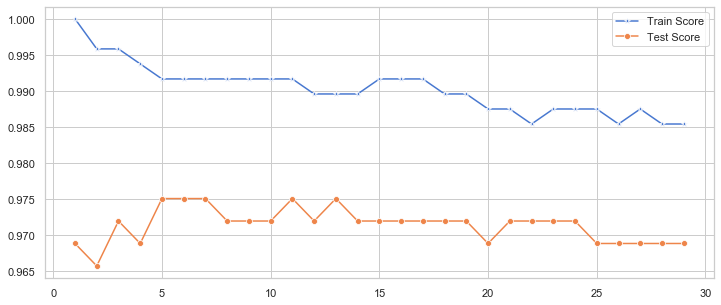

In [344]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,30),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,30),test_scores,marker='o',label='Test Score')

In [345]:
knn=KNeighborsClassifier(7)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9750778816199377

In [346]:
y_pred = knn.predict(X_test)

Text(0.5, 12.5, 'Predicted label')

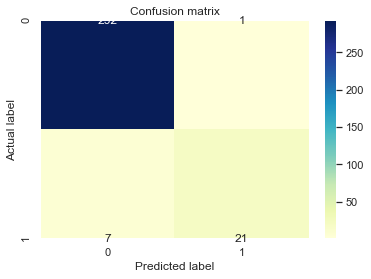

In [347]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [348]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.84

In [349]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       293
           1       0.95      0.75      0.84        28

    accuracy                           0.98       321
   macro avg       0.97      0.87      0.91       321
weighted avg       0.97      0.98      0.97       321



In [338]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test,y_pred))

0.8794192424036542


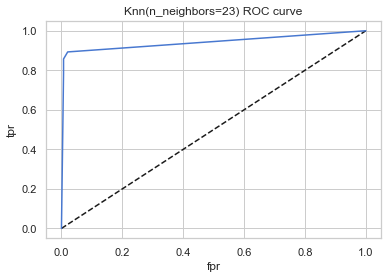

In [339]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=3) ROC curve')
plt.show()

In [381]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y,test_size=0.4,stratify=y)

In [361]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train1,y_train1)

#
y_pred1=logreg.predict(X_test1)

In [362]:
cnf_matrix = metrics.confusion_matrix(y_test1, y_pred1)
cnf_matrix

array([[291,   2],
       [  2,  26]], dtype=int64)

In [363]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       293
           1       0.93      0.93      0.93        28

    accuracy                           0.99       321
   macro avg       0.96      0.96      0.96       321
weighted avg       0.99      0.99      0.99       321



In [364]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y,random_state = 2,test_size=0.4,stratify=y)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train2, y_train2)
y_pred2=classifier.predict(X_test2)

In [365]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test2, y_pred2)
cnf_matrix

array([[291,   2],
       [  1,  27]], dtype=int64)

In [366]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       293
           1       0.93      0.96      0.95        28

    accuracy                           0.99       321
   macro avg       0.96      0.98      0.97       321
weighted avg       0.99      0.99      0.99       321



In [367]:
############ CROSS VALIDATION ##################

In [371]:
####### CROSS VALIDATION ###########
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=10)

scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
print(scores)

[1.     0.9625 1.     0.9875 0.975  0.9875 1.     0.95   0.9625 0.975 ]


In [374]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 15)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)

[0.9799999999999999, 0.9824999999999999, 0.98375, 0.98375, 0.98375, 0.9824999999999999, 0.9824999999999999, 0.97875, 0.98125, 0.9799999999999999, 0.9799999999999999, 0.9799999999999999, 0.98125, 0.9799999999999999]


In [375]:
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 14
Max of list 0.98375


Text(0, 0.5, 'Cross-validated accuracy')

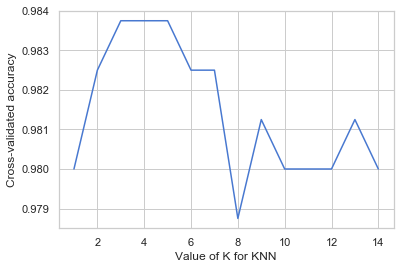

In [376]:
#### WE TAKE K=7
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [387]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state=2,test_size=0.4,stratify=y)

In [388]:
knn=KNeighborsClassifier(7)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9813084112149533

In [389]:
y_pred = knn.predict(X_test)

Text(0.5, 12.5, 'Predicted label')

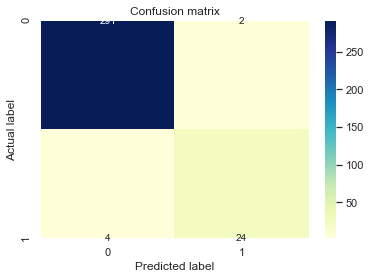

In [390]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [391]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.888888888888889

In [392]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       293
           1       0.92      0.86      0.89        28

    accuracy                           0.98       321
   macro avg       0.95      0.93      0.94       321
weighted avg       0.98      0.98      0.98       321



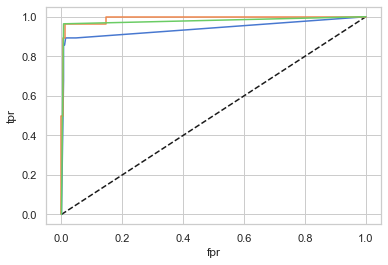

In [400]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
y_pred_proba1=logreg.predict_proba(X_test1)[:,1]
y_pred_proba2=classifier.predict_proba(X_test2)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
fpr1,tpr1,thresholds1=roc_curve(y_test1, y_pred_proba1)
fpr2,tpr2,thresholds2=roc_curve(y_test2, y_pred_proba2)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.plot(fpr1,tpr1,label='Logistic Regression')
plt.plot(fpr2,tpr2,label='Decision tree')
plt.xlabel('fpr')
plt.ylabel('tpr')



plt.show()

In [1]:
######################### Predicting the type 1 of each pokemon ###############################

In [4]:
pkmn=pd.read_csv('pokemon2.csv')

In [12]:
pkmn['capture_rate']

0       45
1       45
2       45
3       45
4       45
      ... 
796     25
797    255
798     15
799      3
800      3
Name: capture_rate, Length: 801, dtype: object

In [15]:
pkmn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

ValueError: invalid literal for int() with base 10: '30 (Meteorite)255 (Core)'